In [333]:
!pip3 install torch

In [334]:
import torch

2 ways exist:
1.   predifind linear class in torch
2.   using custome class


# predefined class

In [335]:
from torch.nn import Linear #import predefined linear class

In [336]:
torch.manual_seed(1) # arbitrary value for getting same resualt in the repetations (make it more determenistic when it comes to generate random numbers)
model= Linear(in_features=1,out_features=1) # for ever singel output we have only singel input
print(model.bias,model.weight) # show the randomly generated parameters as an intial point for our experiment
# in printed output The "requires_grad=True" flag in PyTorch indicates that you want to compute gradients with respect to this tensor during the backward pass.

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


# note
Clarifying the Difference:

1.   torch.tensor(1) creates a scalar tensor.
2.   torch.tensor([1]) creates a vector tensor with one element.

Using square brackets helps clarify the structure and dimensionality of the tensor you're creating.

In [337]:
scalar_tensor = torch.tensor(1)
print(scalar_tensor)  # Output: tensor(1)
print(scalar_tensor.shape)  # Output: torch.Size([])  -> 0-dimensional tensor

vector_tensor = torch.tensor([1])
print(vector_tensor)  # Output: tensor([1])
print(vector_tensor.shape)  # Output: torch.Size([1])  -> 1-dimensional tensor


tensor(1)
torch.Size([])
tensor([1])
torch.Size([1])


In [338]:
x= torch.tensor([2.0]) # for single prediction pass a vector of size 1
print(model(x)) # for predictioin
x= torch.tensor([[2.0],[3.0]]) # for multi prediction pass a vector of size 2 note: because we say we have one input we should wrap them in []
print(model(x)) # for predictioin


tensor([0.5891], grad_fn=<ViewBackward0>)
tensor([[0.5891],
        [1.1044]], grad_fn=<AddmmBackward0>)


# custome class

In [339]:
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

create dataset

Text(0.5, 0, 'x')

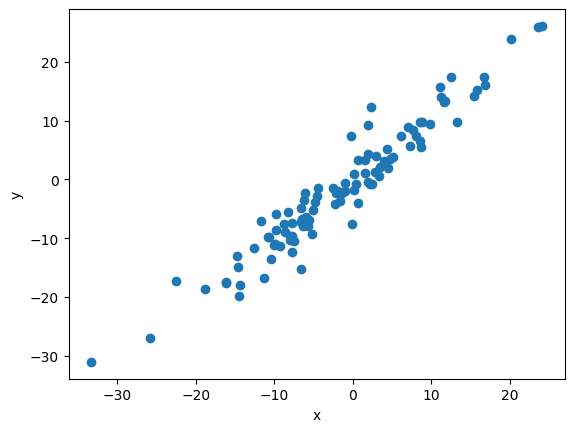

In [340]:
data_x=torch.randn(100,1)* 10 #*10 for scaling purpose # one hundered point with one value in the form of nurmal disteribution
data_y=data_x + torch.randn(100,1)*3 # add noise to y
plt.plot(data_x.numpy(), data_y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

define our custome class

In [341]:
class LR(nn.Module): # nn.Module is a base class for all neural network modules in PyTorch. inherit from nn.Module to take advantage of PyTorch's built-in functionalities and structures.
  def __init__(self, input_size,output_size): # like the original class we should use how many output is result of howmany input
    super().__init__()
    self.linear=nn.Linear(input_size,output_size)

  def forward(self, x):
    return self.linear(x)

In [342]:
torch.manual_seed(1) # manage randomness regeneration
model= LR(input_size=1,output_size=1)
print(list(model.parameters()))
x= torch.tensor([2.0])
print(model.forward(x))
x= torch.tensor([[2.0],[3.0]])
print(model.forward(x))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
tensor([0.5891], grad_fn=<ViewBackward0>)
tensor([[0.5891],
        [1.1044]], grad_fn=<AddmmBackward0>)


In [343]:
def get_params():
  [w, b] = model.parameters()
  return (w[0][0].item(), b[0].item())

get_params()

(0.5152631998062134, -0.44137823581695557)

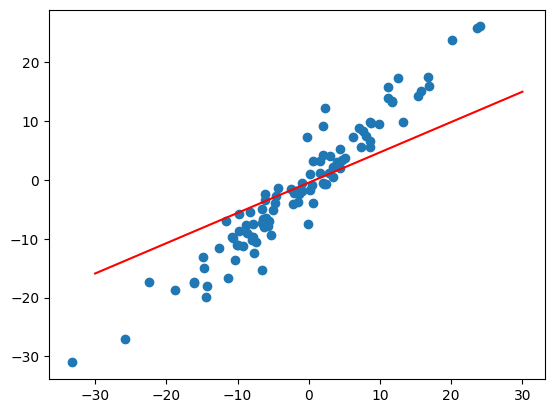

In [344]:
def plot_fit(title):
  plt.title = title
  wl, bl = get_params()
  xl = np.array([-30, 30])
  yl = wl*xl + bl
  plt.plot(xl, yl, 'r')
  plt.scatter(data_x, data_y)
  plt.show()
plot_fit('Initial Model')

In [345]:
criterion= nn.MSELoss() # define a loss fuction for our operation
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0005)# we use stockastick gradiant descent ( it is in contrast of batch gredient descent wich use all the point; while it use a sample or a point to evaluate. therefore it reduces the cost of whole operation by using a good estimate)


trainig

In [346]:
epochs=100
losses=[]
for i in range(epochs):
  y_pred=model.forward(data_x)
  loss=criterion(y_pred,data_y)
  print("epoch:",i,"loss:", loss.item())
  losses.append(loss)
  optimizer.zero_grad() # The primary function of optimizer.zero_grad() is to reset the gradients of all parameters that are being optimized. In PyTorch, gradients accumulate by default; that is, each time loss.backward() is called, the computed gradients are added to the existing gradients stored in each parameter's .grad attribute. This means that if you do not clear the gradients, they will keep accumulating across iterations, which can lead to incorrect updates during optimization.
  loss.backward() # computes the gradients of the loss with respect to the model's parameters. After loss.backward(), the gradients are stored in the grad attribute of each parameter tensor. These gradients indicate how much each parameter should be updated to minimize the loss.
  optimizer.step() # updates the model's parameters using the computed gradients and the optimization algorithm specified by the optimizer (e.g., SGD, Adam).
  '''
  Parameter Update: The primary role of optimizer.step() is to update the model parameters (weights and biases) based on the gradients computed during the backpropagation step, which is executed by loss.backward(). This function applies the optimization algorithm (e.g., Stochastic Gradient Descent, Adam) to adjust the parameters in a way that reduces the loss function.
  Gradient Utilization: After calling loss.backward(), the gradients of the loss with respect to each parameter are stored in the .grad attribute of those parameters. When optimizer.step() is called, it uses these gradients to update the parameters according to the specific rules defined by the optimization algorithm being used.
  '''

epoch: 0 loss: 36.448326110839844
epoch: 1 loss: 30.8323917388916
epoch: 2 loss: 26.347143173217773
epoch: 3 loss: 22.764917373657227
epoch: 4 loss: 19.903892517089844
epoch: 5 loss: 17.618864059448242
epoch: 6 loss: 15.79384994506836
epoch: 7 loss: 14.336231231689453
epoch: 8 loss: 13.172035217285156
epoch: 9 loss: 12.242179870605469
epoch: 10 loss: 11.499484062194824
epoch: 11 loss: 10.906261444091797
epoch: 12 loss: 10.432417869567871
epoch: 13 loss: 10.053915023803711
epoch: 14 loss: 9.751559257507324
epoch: 15 loss: 9.510016441345215
epoch: 16 loss: 9.31704330444336
epoch: 17 loss: 9.162858963012695
epoch: 18 loss: 9.039656639099121
epoch: 19 loss: 8.94119644165039
epoch: 20 loss: 8.862497329711914
epoch: 21 loss: 8.799579620361328
epoch: 22 loss: 8.749265670776367
epoch: 23 loss: 8.70901870727539
epoch: 24 loss: 8.676813125610352
epoch: 25 loss: 8.651028633117676
epoch: 26 loss: 8.630372047424316
epoch: 27 loss: 8.613812446594238
epoch: 28 loss: 8.6005220413208
epoch: 29 loss: 8.

Text(0.5, 0, 'Epochs')

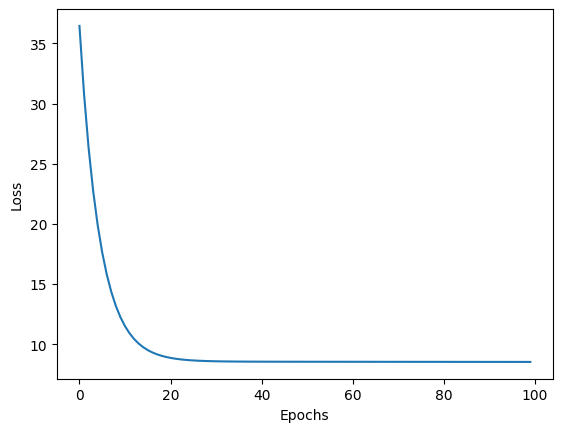

In [347]:
plt.plot(range(epochs),[loss.detach().item() for loss in losses])
plt.ylabel("Loss")
plt.xlabel("Epochs")

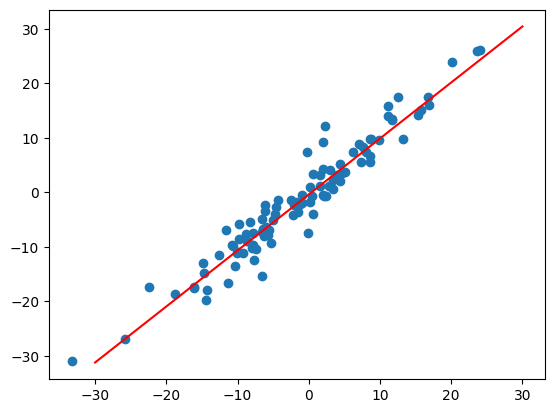

In [348]:
plot_fit("Trained model")